In [10]:
import tensorflow as tf
import rioxarray as rxr
from tqdm import tqdm 
import xarray as xr 
import numpy as np 
from keras.models import load_model
from Model import grad_loss 
import pickle 

modelo_cargado = load_model('red/red_2022062100_2022122100_old_e70_BS32_RES_2.h5', custom_objects={'grad_loss': grad_loss})
modelo_cargado.summary()

with open('red/historial_2022062100_2022122100_old_e70_BS32_RES_2.pkl', 'rb') as file:
    history = pickle.load(file)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 3, 32, 32,   0           []                               
                                1)]                                                               
                                                                                                  
 conv3d (Conv3D)                (None, 3, 32, 32, 7  5472        ['input_1[0][0]']                
                                2)                                                                
                                                                                                  
 input_3 (InputLayer)           [(None, 3, 32, 32,   0           []                               
                                1)]                                                           

In [11]:
mae_final = history['mae'][-1] 
mse_final = history['mse'][-1] 
print("mse_final: ",mse_final)
print("mae_final: ",mae_final)


mse_final:  7.465039379894733e-05
mae_final:  0.006213358137756586


In [12]:
optimizador_utilizado = modelo_cargado.optimizer.get_config()['name']
loss_utilizada = modelo_cargado.loss
metrics_utilizadas = modelo_cargado.metrics_names
lr_utilizado=modelo_cargado.optimizer.lr
epochs= len(history['loss'])

print("Optimizador utilizado:", optimizador_utilizado)
print("Función de pérdida (loss) utilizada:", loss_utilizada)
print("Métricas utilizadas:", metrics_utilizadas)
print("lR utilizado: ", lr_utilizado)
print("Épocas utilizadas: ", epochs)

Optimizador utilizado: Adam
Función de pérdida (loss) utilizada: <function grad_loss at 0x000001B20B031090>
Métricas utilizadas: ['loss', 'mse', 'mae', 'mape']
lR utilizado:  <tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.001>
Épocas utilizadas:  70


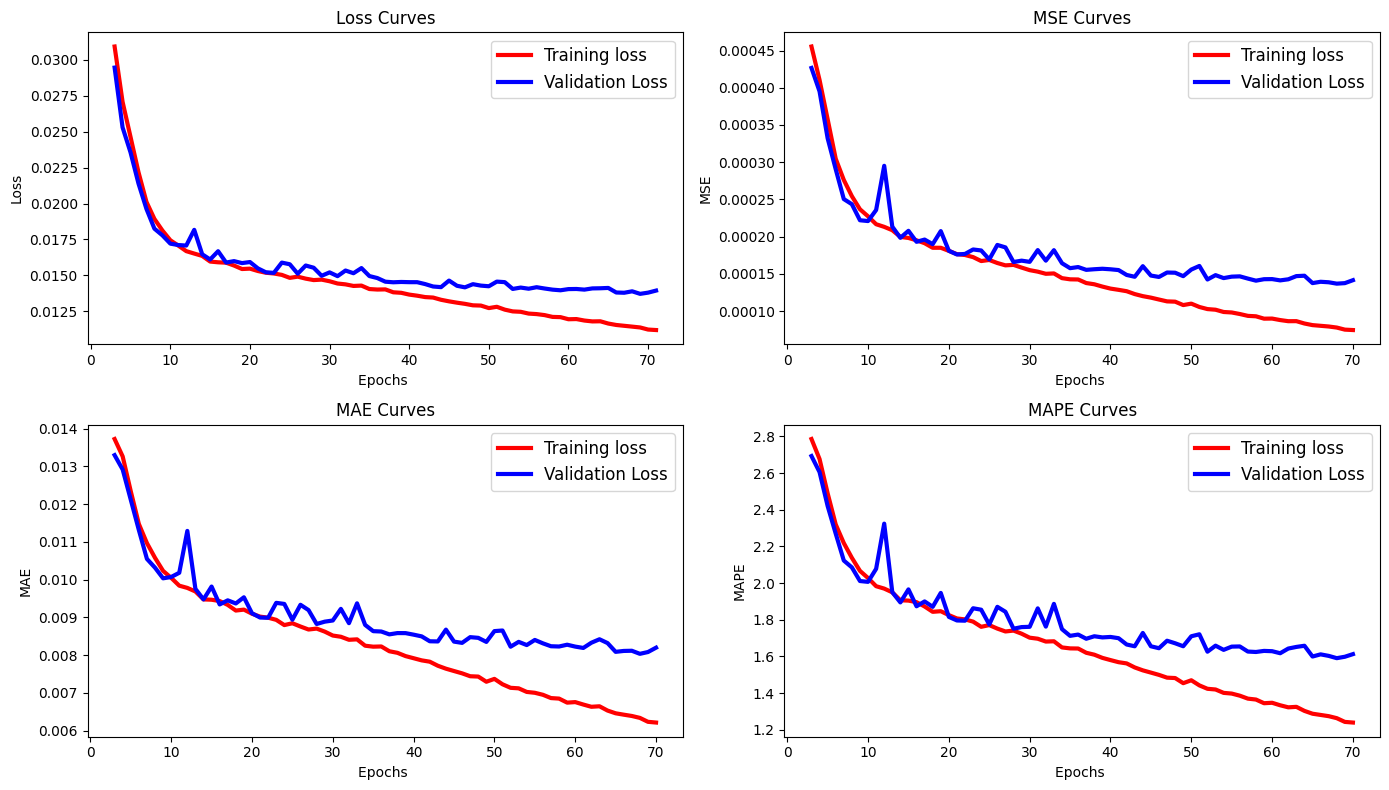

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axs = plt.subplots(2, 2, figsize=(14, 8))

axs[0, 0].plot(np.arange(3,epochs+2), history['loss'][-(epochs - 1):],'r',linewidth=3.0)
axs[0, 0].plot(np.arange(3,epochs+2), history['val_loss'][-(epochs - 1):],'b',linewidth=3.0)
axs[0, 0].legend(['Training loss', 'Validation Loss'],fontsize=12)
axs[0, 0].set_xlabel('Epochs ',fontsize=10)
axs[0, 0].set_ylabel('Loss',fontsize=10)
axs[0, 0].set_title('Loss Curves',fontsize=12)

axs[0, 1].plot(np.arange(3,epochs+1),history['mse'][-(epochs - 2):],'r',linewidth=3.0)
axs[0, 1].plot(np.arange(3,epochs+1),history['val_mse'][-(epochs - 2):],'b',linewidth=3.0)
axs[0, 1].legend(['Training loss', 'Validation Loss'],fontsize=12)
axs[0, 1].set_xlabel('Epochs ',fontsize=10)
axs[0, 1].set_ylabel('MSE',fontsize=10)
axs[0, 1].set_title('MSE Curves',fontsize=12)

axs[1, 0].plot(np.arange(3,epochs+1),history['mae'][-(epochs - 2):],'r',linewidth=3.0)
axs[1, 0].plot(np.arange(3,epochs+1),history['val_mae'][-(epochs - 2):],'b',linewidth=3.0)
axs[1, 0].legend(['Training loss', 'Validation Loss'],fontsize=12)
axs[1, 0].set_xlabel('Epochs ',fontsize=10)
axs[1, 0].set_ylabel('MAE',fontsize=10)
axs[1, 0].set_title('MAE Curves',fontsize=12)

axs[1, 1].plot(np.arange(3,epochs+1),history['mape'][-(epochs - 2):],'r',linewidth=3.0)
axs[1, 1].plot(np.arange(3,epochs+1),history['val_mape'][-(epochs - 2):],'b',linewidth=3.0)
axs[1, 1].legend(['Training loss', 'Validation Loss'],fontsize=12)
axs[1, 1].set_xlabel('Epochs ',fontsize=10)
axs[1, 1].set_ylabel('MAPE',fontsize=10)
axs[1, 1].set_title('MAPE Curves',fontsize=12)

plt.tight_layout()
plt.show()

In [14]:
with open('red/historial_2022062100_2022122100_old_e70_BS32_RES_2.pkl', 'rb') as file:
    history_1 = pickle.load(file)
with open('red/historial_2022062100_2022122100_old_e70_BS32_RES_3.pkl', 'rb') as file:
    history_2 = pickle.load(file)
with open('red/historial_2022062100_2022122100_old_e70_BS32_RES_4.pkl', 'rb') as file:
    history_3 = pickle.load(file)

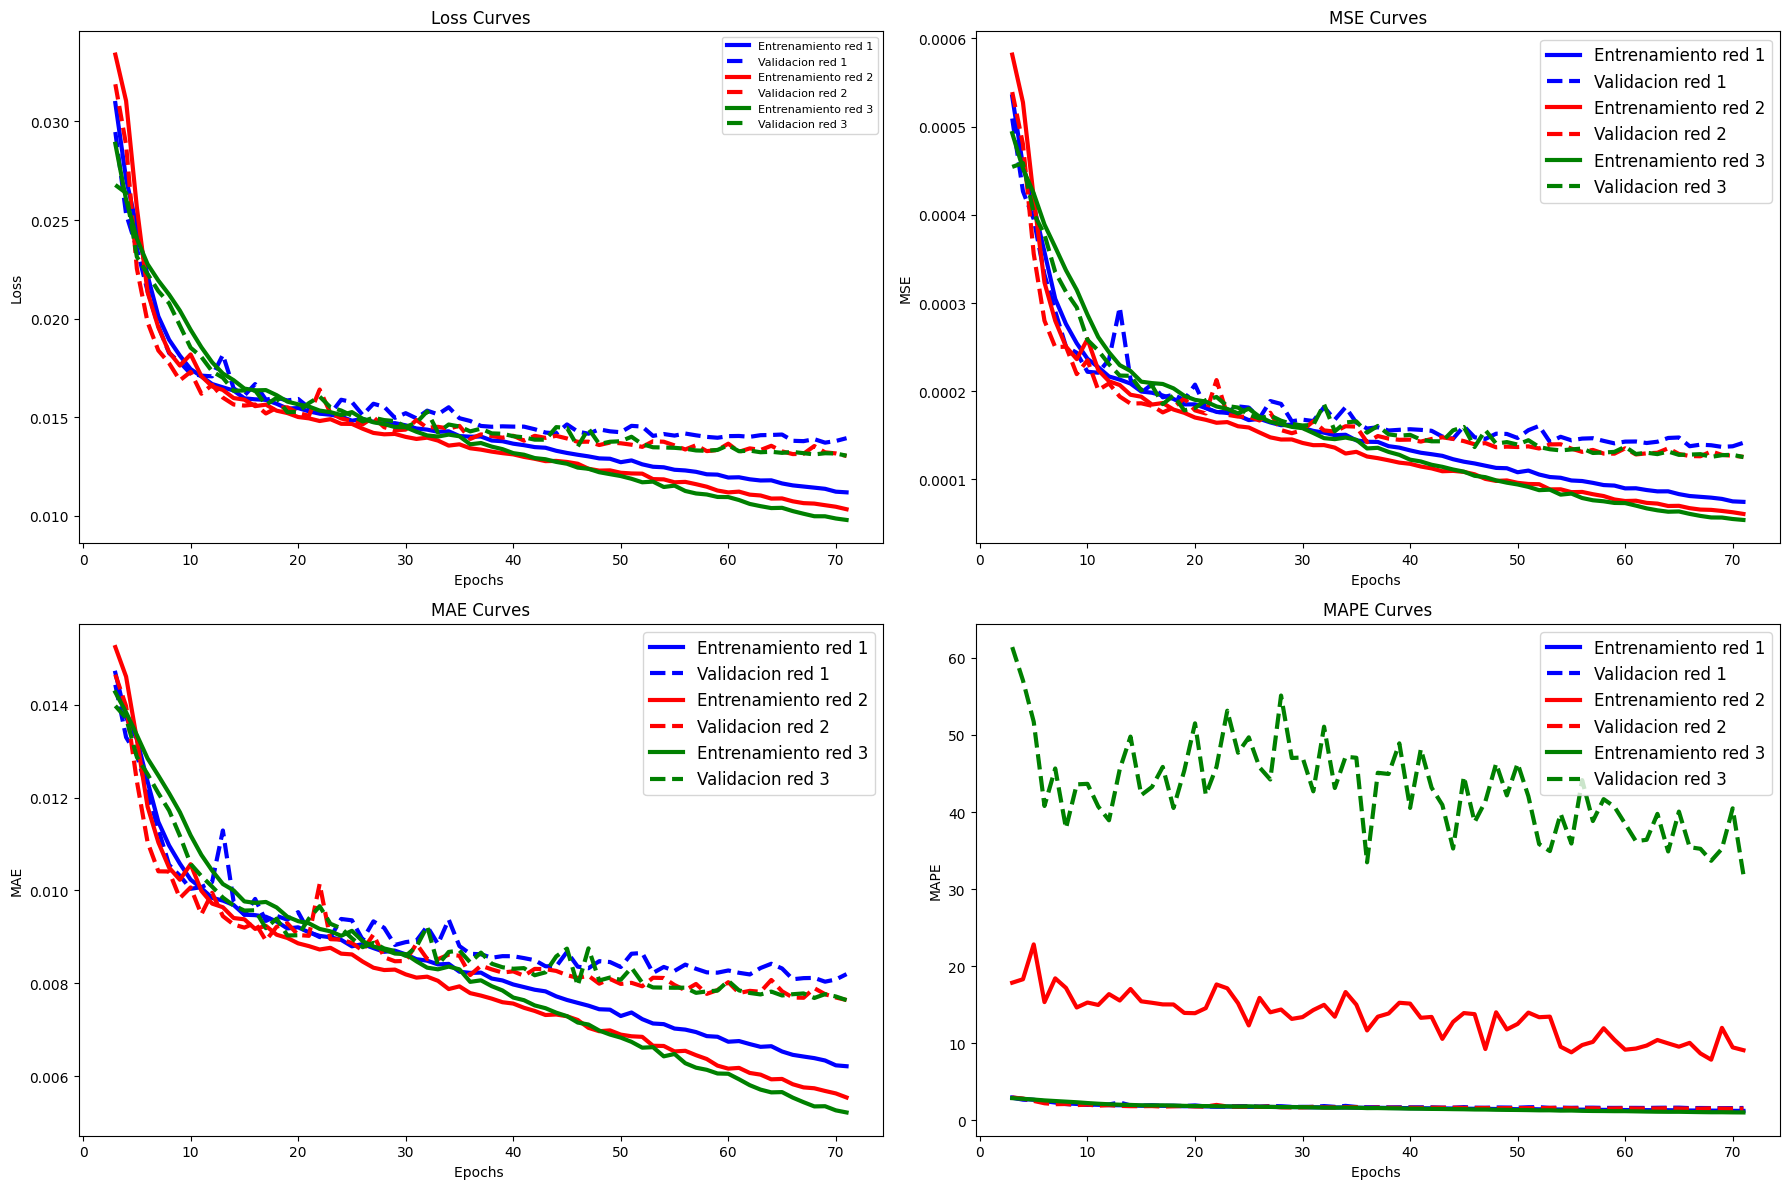

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

##plot 1##
axs[0, 0].plot(np.arange(3,epochs+2), history_1['loss'][-(epochs - 1):],linewidth=3.0, color="blue", label='a')
axs[0, 0].plot(np.arange(3,epochs+2), history_1['val_loss'][-(epochs - 1):], linestyle='--', linewidth=3.0, color="blue")
axs[0, 0].plot(np.arange(3,epochs+2), history_2['loss'][-(epochs - 1):],linewidth=3.0, color="red", label='a')
axs[0, 0].plot(np.arange(3,epochs+2), history_2['val_loss'][-(epochs - 1):], linestyle='--', linewidth=3.0, color="red")
axs[0, 0].plot(np.arange(3,epochs+2), history_3['loss'][-(epochs - 1):],linewidth=3.0, color="green")
axs[0, 0].plot(np.arange(3,epochs+2), history_3['val_loss'][-(epochs - 1):], linestyle='--', linewidth=3.0, color="green")

axs[0, 0].legend(['Entrenamiento red 1', 'Validacion red 1','Entrenamiento red 2', 'Validacion red 2', 'Entrenamiento red 3', 'Validacion red 3'],fontsize=8)
axs[0, 0].set_xlabel('Epochs ',fontsize=10)
axs[0, 0].set_ylabel('Loss',fontsize=10)
axs[0, 0].set_title('Loss Curves',fontsize=12)

##plot 2##
axs[0, 1].plot(np.arange(3,epochs+2), history_1['mse'][-(epochs - 1):],linewidth=3.0, color="blue", label='a')
axs[0, 1].plot(np.arange(3,epochs+2), history_1['val_mse'][-(epochs - 1):], linestyle='--', linewidth=3.0, color="blue")
axs[0, 1].plot(np.arange(3,epochs+2), history_2['mse'][-(epochs - 1):],linewidth=3.0, color="red", label='a')
axs[0, 1].plot(np.arange(3,epochs+2), history_2['val_mse'][-(epochs - 1):], linestyle='--', linewidth=3.0, color="red")
axs[0, 1].plot(np.arange(3,epochs+2), history_3['mse'][-(epochs - 1):],linewidth=3.0, color="green")
axs[0, 1].plot(np.arange(3,epochs+2), history_3['val_mse'][-(epochs - 1):], linestyle='--', linewidth=3.0, color="green")

axs[0, 1].legend(['Entrenamiento red 1', 'Validacion red 1','Entrenamiento red 2', 'Validacion red 2', 'Entrenamiento red 3', 'Validacion red 3'],fontsize=12)
axs[0, 1].set_xlabel('Epochs ',fontsize=10)
axs[0, 1].set_ylabel('MSE',fontsize=10)
axs[0, 1].set_title('MSE Curves',fontsize=12)

##plot 3##
axs[1, 0].plot(np.arange(3,epochs+2), history_1['mae'][-(epochs - 1):],linewidth=3.0, color="blue", label='a')
axs[1, 0].plot(np.arange(3,epochs+2), history_1['val_mae'][-(epochs - 1):], linestyle='--', linewidth=3.0, color="blue")
axs[1, 0].plot(np.arange(3,epochs+2), history_2['mae'][-(epochs - 1):],linewidth=3.0, color="red", label='a')
axs[1, 0].plot(np.arange(3,epochs+2), history_2['val_mae'][-(epochs - 1):], linestyle='--', linewidth=3.0, color="red")
axs[1, 0].plot(np.arange(3,epochs+2), history_3['mae'][-(epochs - 1):],linewidth=3.0, color="green")
axs[1, 0].plot(np.arange(3,epochs+2), history_3['val_mae'][-(epochs - 1):], linestyle='--', linewidth=3.0, color="green")

axs[1, 0].legend(['Entrenamiento red 1', 'Validacion red 1','Entrenamiento red 2', 'Validacion red 2', 'Entrenamiento red 3', 'Validacion red 3'],fontsize=12)
axs[1, 0].set_xlabel('Epochs ',fontsize=10)
axs[1, 0].set_ylabel('MAE',fontsize=10)
axs[1, 0].set_title('MAE Curves',fontsize=12)

##plot 4##
axs[1, 1].plot(np.arange(3,epochs+2), history_1['mape'][-(epochs - 1):],linewidth=3.0, color="blue", label='a')
axs[1, 1].plot(np.arange(3,epochs+2), history_1['val_mape'][-(epochs - 1):], linestyle='--', linewidth=3.0, color="blue")
axs[1, 1].plot(np.arange(3,epochs+2), history_2['mape'][-(epochs - 1):],linewidth=3.0, color="red", label='a')
axs[1, 1].plot(np.arange(3,epochs+2), history_2['val_mape'][-(epochs - 1):], linestyle='--', linewidth=3.0, color="red")
axs[1, 1].plot(np.arange(3,epochs+2), history_3['mape'][-(epochs - 1):],linewidth=3.0, color="green")
axs[1, 1].plot(np.arange(3,epochs+2), history_3['val_mape'][-(epochs - 1):], linestyle='--', linewidth=3.0, color="green")

axs[1, 1].legend(['Entrenamiento red 1', 'Validacion red 1','Entrenamiento red 2', 'Validacion red 2', 'Entrenamiento red 3', 'Validacion red 3'],fontsize=12)
axs[1, 1].set_xlabel('Epochs ',fontsize=10)
axs[1, 1].set_ylabel('MAPE',fontsize=10)
axs[1, 1].set_title('MAPE Curves',fontsize=12)

plt.tight_layout()
plt.show()

In [16]:
with open('red/historial_2022062100_2022122100_old_e70_BS32_MAE_RES_3.pkl', 'rb') as file:
    history_mae = pickle.load(file)

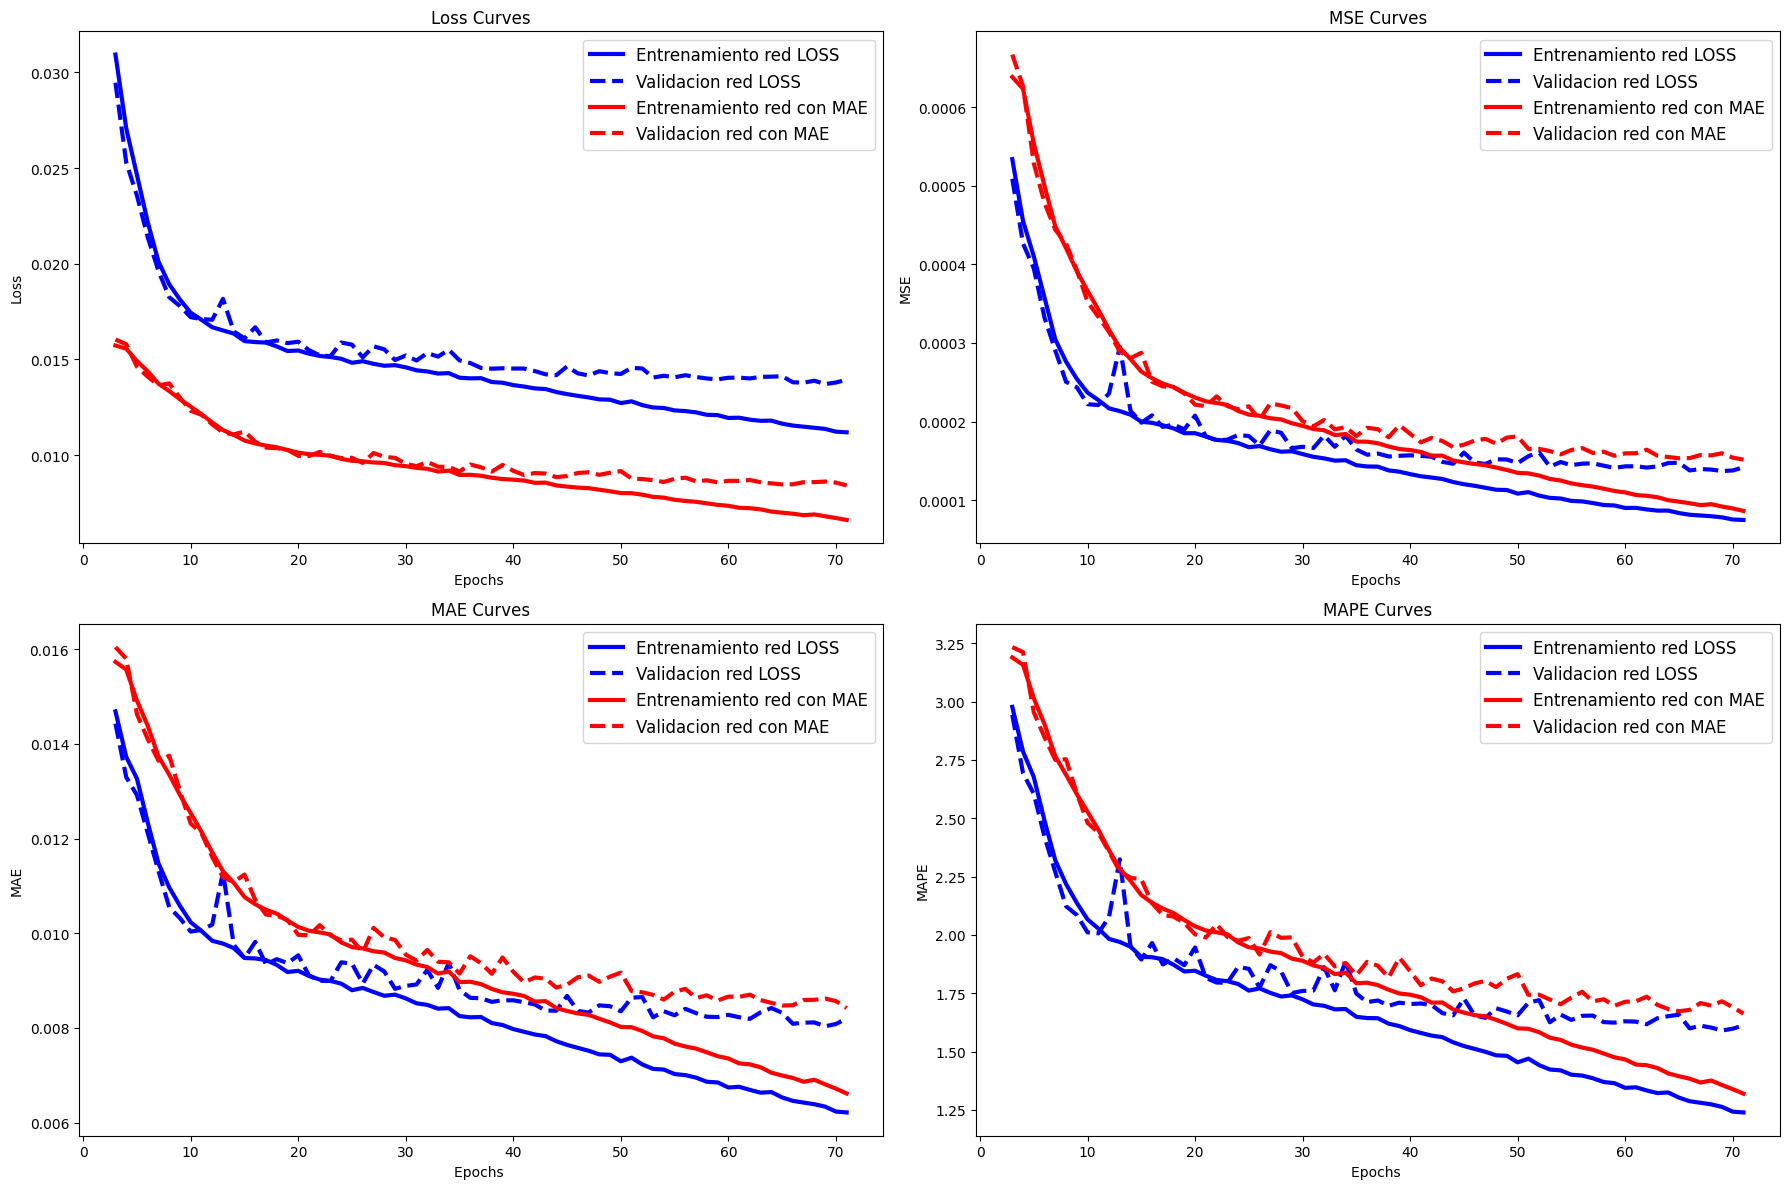

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

##plot 1##
axs[0, 0].plot(np.arange(3,epochs+2), history_1['loss'][-(epochs - 1):],linewidth=3.0, color="blue", label='a')
axs[0, 0].plot(np.arange(3,epochs+2), history_1['val_loss'][-(epochs - 1):], linestyle='--', linewidth=3.0, color="blue")
axs[0, 0].plot(np.arange(3,epochs+2), history_mae['loss'][-(epochs - 1):],linewidth=3.0, color="red")
axs[0, 0].plot(np.arange(3,epochs+2), history_mae['val_loss'][-(epochs - 1):], linestyle='--', linewidth=3.0, color="red")

axs[0, 0].legend(['Entrenamiento red LOSS', 'Validacion red LOSS','Entrenamiento red con MAE', 'Validacion red con MAE'],fontsize=12)
axs[0, 0].set_xlabel('Epochs ',fontsize=10)
axs[0, 0].set_ylabel('Loss',fontsize=10)
axs[0, 0].set_title('Loss Curves',fontsize=12)

##plot 2##
axs[0, 1].plot(np.arange(3,epochs+2), history_1['mse'][-(epochs - 1):],linewidth=3.0, color="blue", label='a')
axs[0, 1].plot(np.arange(3,epochs+2), history_1['val_mse'][-(epochs - 1):], linestyle='--', linewidth=3.0, color="blue")
axs[0, 1].plot(np.arange(3,epochs+2), history_mae['mse'][-(epochs - 1):],linewidth=3.0, color="red")
axs[0, 1].plot(np.arange(3,epochs+2), history_mae['val_mse'][-(epochs - 1):], linestyle='--', linewidth=3.0, color="red")

axs[0, 1].legend(['Entrenamiento red LOSS', 'Validacion red LOSS','Entrenamiento red con MAE', 'Validacion red con MAE'],fontsize=12)
axs[0, 1].set_xlabel('Epochs ',fontsize=10)
axs[0, 1].set_ylabel('MSE',fontsize=10)
axs[0, 1].set_title('MSE Curves',fontsize=12)

##plot 3##
axs[1, 0].plot(np.arange(3,epochs+2), history_1['mae'][-(epochs - 1):],linewidth=3.0, color="blue", label='a')
axs[1, 0].plot(np.arange(3,epochs+2), history_1['val_mae'][-(epochs - 1):], linestyle='--', linewidth=3.0, color="blue")
axs[1, 0].plot(np.arange(3,epochs+2), history_mae['mae'][-(epochs - 1):],linewidth=3.0, color="red")
axs[1, 0].plot(np.arange(3,epochs+2), history_mae['val_mae'][-(epochs - 1):], linestyle='--', linewidth=3.0, color="red")

axs[1, 0].legend(['Entrenamiento red LOSS', 'Validacion red LOSS','Entrenamiento red con MAE', 'Validacion red con MAE'],fontsize=12)
axs[1, 0].set_xlabel('Epochs ',fontsize=10)
axs[1, 0].set_ylabel('MAE',fontsize=10)
axs[1, 0].set_title('MAE Curves',fontsize=12)

##plot 4##
axs[1, 1].plot(np.arange(3,epochs+2), history_1['mape'][-(epochs - 1):],linewidth=3.0, color="blue", label='a')
axs[1, 1].plot(np.arange(3,epochs+2), history_1['val_mape'][-(epochs - 1):], linestyle='--', linewidth=3.0, color="blue")
axs[1, 1].plot(np.arange(3,epochs+2), history_mae['mape'][-(epochs - 1):],linewidth=3.0, color="red")
axs[1, 1].plot(np.arange(3,epochs+2), history_mae['val_mape'][-(epochs - 1):], linestyle='--', linewidth=3.0, color="red")

axs[1, 1].legend(['Entrenamiento red LOSS', 'Validacion red LOSS','Entrenamiento red con MAE', 'Validacion red con MAE'],fontsize=12)
axs[1, 1].set_xlabel('Epochs ',fontsize=10)
axs[1, 1].set_ylabel('MAPE',fontsize=10)
axs[1, 1].set_title('MAPE Curves',fontsize=12)

plt.tight_layout()
plt.show()

In [2]:
from functions import Data_nc as data_nc
import re 


g05=data_nc( fname="GFS0.5_t2m_heightAboveGround_instant_2022010100_*.nc", path="../Datos/GFS/2022_std")
g05.path_collection()
g05.loadVar()

era5=data_nc( fname="era5_2022*.nc", path="../Datos/ERA5/2022_std")
era5.path_collection()
era5.loadVar()

g05.upscaleVar(era5.values_t2m)


primer_dia=re.findall(r'\d+', g05.path_ncfiles[0])[-1] 
ultimo_dia=re.findall(r'\d+', g05.path_ncfiles[-1])[-1] 
intervalo= primer_dia + "_" + ultimo_dia
intervalo="2022062100_2022122100"


gfs_parches   = tf.convert_to_tensor(np.load("parches/gfs_"+intervalo+".npy"))
era5_parches  = tf.convert_to_tensor(np.load("parches/era5_"+intervalo+".npy"))
lat_parches   = tf.convert_to_tensor(np.load("parches/lat_"+intervalo+".npy"))
lon_parches   = tf.convert_to_tensor(np.load("parches/lon_"+intervalo+".npy"))
orog_parches  = tf.convert_to_tensor(np.load("parches/orog_"+intervalo+".npy"))
time1_parches = tf.convert_to_tensor(np.load("parches/time1_"+intervalo+".npy"))
time2_parches = tf.convert_to_tensor(np.load("parches/time2_"+intervalo+".npy"))

c:\Users\rlagos\anaconda3\envs\sivar\lib\site-packages\xarray\backends\plugins.py:71: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [25]:
parche_1=tf.expand_dims(era5.values_t2m[1:4,0:32, 0:32],axis=0 )

In [29]:
parche_1[0,0,:]

<tf.Tensor: shape=(32, 32), dtype=float32, numpy=
array([[290.73688, 290.71268, 290.47244, ..., 280.26562, 284.0716 ,
        287.17862],
       [290.70016, 290.67514, 290.5884 , ..., 277.42218, 275.34946,
        278.45477],
       [290.62177, 290.69016, 290.6034 , ..., 274.86566, 272.79294,
        270.37155],
       ...,
       [289.79266, 289.77182, 289.83438, ..., 288.95273, 289.10703,
        289.21298],
       [289.811  , 289.76263, 289.8252 , ..., 288.95105, 289.10538,
        289.12872],
       [289.8494 , 289.80017, 289.84103, ..., 288.9344 , 288.92938,
        288.95273]], dtype=float32)>

In [30]:
time1_parches[0,:,0,0]

<tf.Tensor: shape=(3, 1), dtype=float64, numpy=
array([[1.47744e+16],
       [1.47852e+16],
       [1.47960e+16]])>

In [23]:
def extraccion_parches(Var, dx=32):

        stack = tf.stack([],axis=0)
        dim_t= Var.shape[0]
        dim_lat= Var.shape[1]
        dim_lon= Var.shape[2]

        #recorremos en el tiempo
        for dt in tqdm(range(0,dim_t -2)):
            #recorremos en la latitude
            for dlat in range(0,dim_lat,dx):
                #recorremos en la longitude
                for dlong in range(0,dim_lon,dx):  
                    #Cortamos parches de 32x32 en 3 tiempos             
                    parche=Var[ dt:(dt+3), dlat:(dlat+dx), dlong:(dlong+dx)]

                    #si el stack no está vacío, concatenamos los parches
                    if tf.equal(tf.size(stack), 0) == False:
                        parche = tf.expand_dims(parche, axis=0)
                        stack= tf.concat((stack, parche), axis=0)
                        #y pasamos a la siguiente iteración
                        continue
                
                    #si el stack está vacío, lo inicializamos
                    stack=tf.stack([parche],axis=0)
        patches = tf.expand_dims(stack, 4) 
        print("Stack patches shape: ",patches.shape)   

        return patches

In [55]:
def combined_image(tensor_pic):
    positions = [(0, 0), (0, 32), 
             (32, 0), (32, 32), 
             (64, 0), (64, 32), 
             (96, 0), (96, 32), 
             (128, 0), (128, 32), 
             (160, 0), (160, 32), 
             (192, 0), (192, 32)]

    image_size = 32
    combined_image = np.zeros((6 * image_size, 2 * image_size), dtype=np.float32)

    for i,j in enumerate( range(12)):
        tensor_data = tensor_pic[j].numpy()  
        combined_image[ positions[i][0]:positions[i][0] + image_size,  positions[i][1]:positions[i][1] + image_size ] = tensor_data   

    return combined_image  

def output_plot(input_plot,observed,fore):
    residuals = observed - fore
    
    params = {'axes.titlesize':'9',
              'xtick.labelsize':'9',
              'ytick.labelsize':'9',
              'figure.figsize': (20,20),
              'figure.dpi': 200
              }
    #plt.figure(figsize=[16,16])
    plt.style.use('ggplot')
    plt.rcParams.update(params)

    i=4
    plt.subplot(141) #131
    plt.imshow(fore, vmin = np.min([fore,observed]), vmax = np.max([fore,observed]))
    plt.colorbar(orientation="vertical",fraction=0.047, pad=0.01)
    plt.title('forecasted')

    plt.subplot(142) #132
    plt.imshow(residuals, vmin = np.min(residuals), vmax = np.max(residuals))
    plt.colorbar(orientation="vertical", fraction=0.047, pad=0.01)
    plt.title('residuals')


    plt.subplot(143) #132
    plt.imshow(observed, vmin = np.min([fore,observed]), vmax = np.max([fore,observed]))
    plt.colorbar(orientation="vertical",fraction=0.047, pad=0.01)
    plt.title('testing target')

    plt.subplot(144)
    plt.imshow(input_plot,
                    vmin = np.min([input_plot]),
                    vmax = np.max([input_plot]))
    plt.colorbar(orientation="vertical",fraction=0.047, pad=0.01)
    plt.title('input te')

    #plt.savefig('grad_loss.png')
    plt.show()

In [39]:
target_norm, scale_factor_target = g05.normalization(era5_parches)
inp_norm, scale_factor_inp = g05.normalization(gfs_parches)
lat_norm, scale_factor_lat = g05.normalization(lat_parches)
lon_norm, scale_factor_lon = g05.normalization(lon_parches)
orog_norm, scale_factor_orog = g05.normalization(orog_parches)
time_norm, scale_factor_time = g05.normalization(time1_parches)
time2_norm, scale_factor_time = g05.normalization(time2_parches)

### Revisión de salidas:
- Importación de parches utilizados:

In [37]:
inp_tr= tf.convert_to_tensor(np.load("parches/gfs_tr2022062100_2022122100_old_e70_BS32_RES_2.npy"))
target_tr   = tf.convert_to_tensor(np.load("parches/era5_tr2022062100_2022122100_old_e70_BS32_RES_2.npy"))
lat_tr   = tf.convert_to_tensor(np.load("parches/lat_tr2022062100_2022122100_old_e70_BS32_RES_2.npy"))
lon_tr   = tf.convert_to_tensor(np.load("parches/lon_tr2022062100_2022122100_old_e70_BS32_RES_2.npy"))
orog_tr  = tf.convert_to_tensor(np.load("parches/orog_tr2022062100_2022122100_old_e70_BS32_RES_2.npy"))
time1_tr = tf.convert_to_tensor(np.load("parches/time1_tr2022062100_2022122100_old_e70_BS32_RES_2.npy"))
time2_tr = tf.convert_to_tensor(np.load("parches/time2_tr2022062100_2022122100_old_e70_BS32_RES_2.npy"))

inp_va= tf.convert_to_tensor(np.load("parches/gfs_va2022062100_2022122100_old_e70_BS32_RES_2.npy"))
target_va   = tf.convert_to_tensor(np.load("parches/era5_va2022062100_2022122100_old_e70_BS32_RES_2.npy"))
lat_va   = tf.convert_to_tensor(np.load("parches/lat_va2022062100_2022122100_old_e70_BS32_RES_2.npy"))
lon_va   = tf.convert_to_tensor(np.load("parches/lon_va2022062100_2022122100_old_e70_BS32_RES_2.npy"))
orog_va  = tf.convert_to_tensor(np.load("parches/orog_va2022062100_2022122100_old_e70_BS32_RES_2.npy"))
time1_va = tf.convert_to_tensor(np.load("parches/time1_va2022062100_2022122100_old_e70_BS32_RES_2.npy"))
time2_va = tf.convert_to_tensor(np.load("parches/time2_va2022062100_2022122100_old_e70_BS32_RES_2.npy"))

inp_te= tf.convert_to_tensor(np.load("parches/gfs_te2022062100_2022122100_old_e70_BS32_RES_2.npy"))
target_te   = tf.convert_to_tensor(np.load("parches/era5_te2022062100_2022122100_old_e70_BS32_RES_2.npy"))
lat_te   = tf.convert_to_tensor(np.load("parches/lat_te2022062100_2022122100_old_e70_BS32_RES_2.npy"))
lon_te   = tf.convert_to_tensor(np.load("parches/lon_te2022062100_2022122100_old_e70_BS32_RES_2.npy"))
orog_te  = tf.convert_to_tensor(np.load("parches/orog_te2022062100_2022122100_old_e70_BS32_RES_2.npy"))
time1_te = tf.convert_to_tensor(np.load("parches/time1_te2022062100_2022122100_old_e70_BS32_RES_2.npy"))
time2_te = tf.convert_to_tensor(np.load("parches/time2_te2022062100_2022122100_old_e70_BS32_RES_2.npy"))

print(inp_tr.shape)

(10526, 3, 32, 32, 1)


In [48]:
intervalo="2022062100_2022122100"
info_red="_old_e70_BS32_RES_2_"

for i in range(1,7):
    output_parte= tf.convert_to_tensor(np.load(f"salidas/entrenamiento_"+intervalo+info_red+"p"+str(i)+".npy"))
    if i == 1:
        output_tr=output_parte 
        continue 
    else: 
        output_tr= tf.concat( [output_tr, output_parte], axis=0 )

output_va_p1=tf.convert_to_tensor(np.load("salidas/validacion_"+intervalo+info_red+"p1.npy"))
output_va_p2=tf.convert_to_tensor(np.load("salidas/validacion_"+intervalo+info_red+"p2.npy"))
output_va= tf.concat( [output_va_p1, output_va_p2], axis=0 )

output_te_p1=tf.convert_to_tensor(np.load("salidas/testeo_"+intervalo+info_red+"p1.npy"))
output_te_p2=tf.convert_to_tensor(np.load("salidas/testeo_"+intervalo+info_red+"p2.npy"))
output_te= tf.concat( [output_te_p1, output_te_p2], axis=0 )

print("TR-Output shape: ", output_tr.shape)
print("VA-Output shape: ", output_va.shape)
print("TE-Output shape: ", output_te.shape)

TR-Output shape:  (10526, 1, 32, 32, 1)
VA-Output shape:  (3508, 1, 32, 32, 1)
TE-Output shape:  (3510, 1, 32, 32, 1)


Contanemos el split desordenado:

In [43]:
data_split=tf.concat([time1_tr,time1_va,time1_te], axis=0)
print(data_split.shape)

(17544, 3, 32, 32, 1)


In [77]:
lat_parches[0,0,:,:,0]

<tf.Tensor: shape=(32, 32), dtype=float32, numpy=
array([[-13.125, -13.125, -13.125, ..., -13.125, -13.125, -13.125],
       [-13.375, -13.375, -13.375, ..., -13.375, -13.375, -13.375],
       [-13.625, -13.625, -13.625, ..., -13.625, -13.625, -13.625],
       ...,
       [-20.375, -20.375, -20.375, ..., -20.375, -20.375, -20.375],
       [-20.625, -20.625, -20.625, ..., -20.625, -20.625, -20.625],
       [-20.875, -20.875, -20.875, ..., -20.875, -20.875, -20.875]],
      dtype=float32)>

In [102]:
tensor_1_replicado = tf.tile(target_te[0,:,:,:], [tf.shape(target_norm)[0], 1, 1, 1])

In [103]:
tensor_1_replicado

<tf.Tensor: shape=(17544, 32, 32, 1), dtype=float32, numpy=
array([[[[0.47214317],
         [0.48560768],
         [0.49074927],
         ...,
         [0.49637714],
         [0.49560532],
         [0.49390763]],

        [[0.4762037 ],
         [0.4895975 ],
         [0.4963416 ],
         ...,
         [0.49708968],
         [0.4950476 ],
         [0.49334952]],

        [[0.48102456],
         [0.49143776],
         [0.4981463 ],
         ...,
         [0.49545127],
         [0.49342063],
         [0.48903936]],

        ...,

        [[0.48520398],
         [0.48353   ],
         [0.4807635 ],
         ...,
         [0.46923405],
         [0.46812966],
         [0.4670849 ]],

        [[0.49324247],
         [0.48732945],
         [0.48455107],
         ...,
         [0.46875927],
         [0.46767858],
         [0.46671677]],

        [[0.48937196],
         [0.48345852],
         [0.49007228],
         ...,
         [0.46875927],
         [0.4676312 ],
         [0.46666938]]],




In [282]:
import tensorflow as tf

# Supongamos que tienes dos tensores: tensor_grande y tensor_pequeno

tensor_tr_test = target_tr[:,0,:,:,0]
tensor_va_test = target_va[:,0,:,:,0]
tensor_te_test = target_te[:,0,:,:,0]

tensor_pequeno = target_norm[7,2,:,:,0]

#for tr
condiciones_tr = tf.reduce_all(tf.equal(tensor_tr_test, tensor_pequeno), axis=(1,2))
tr_true = tf.reduce_any(condiciones_tr) 
if tr_true:
    print("Se encuentra en TR")

#for va 
condiciones_va = tf.reduce_all(tf.equal(tensor_va_test, tensor_pequeno), axis=(1,2))
va_true = tf.reduce_any(condiciones_va) 
if va_true:
    print("Se encuentra en VA")

#for te 
condiciones_te = tf.reduce_all(tf.equal(tensor_te_test, tensor_pequeno), axis=(1,2))
te_true = tf.reduce_any(condiciones_te) 
if te_true:
    print("Se encuentra en te")

Se encuentra en te


tr -> 2 
va -> 1        

In [46]:
indices_ordenados = tf.argsort(tf.reduce_min(data_split[:, :, 0, 0, 0], axis=(1), keepdims=False), axis=0)
indices_ordenados[:10]

<tf.Tensor: shape=(10,), dtype=int32, numpy=
array([  858,  3796,  7076,  8740,  9461, 12653, 13543, 13607, 13665,
       14081])>

In [51]:
scale_factor="parches/scale_factor_2022062100_2022122100.pickle"
with open(scale_factor, 'rb') as archivo:
    # Cargar los datos desde el archivo Pickle
    scale_factor = pickle.load(archivo)
scale_factor

{'target': [319.76367, 242.50244],
 'inp': [320.60355, 244.58804],
 'lat': [60.875, 13.125],
 'lon': [78.875, 63.125],
 'orog': [5289.0, 0.0],
 'time1': [3.06612e+16, 1.47744e+16],
 'time2': [1.50336e+16, 1.47744e+16]}

In [57]:
output_full=tf.concat( [output_tr, output_va, output_te], axis=0)
output_ordenado=  tf.gather(output_full, indices_ordenados)

In [58]:
fore_stack     = g05.normalization(data_in=tf.squeeze(output_ordenado),
                     inverse=True, scale_factor=scale_factor['target'])[0]
observed_stack = g05.normalization(data_in=tf.squeeze(target_tr[:,0,:,:]),
                         inverse=True, scale_factor=scale_factor['target'])[0]

input_stack    = g05.normalization(data_in=tf.squeeze(inp_tr[:,0,:,:]),
                         inverse=True, scale_factor=scale_factor['inp'])[0]

print("fore shape: ",fore_stack.shape)
print("observed (target): ", observed_stack.shape)
print("input (gfs): ", input_stack.shape)

fore shape:  (17544, 32, 32)
observed (target):  (10526, 32, 32)
input (gfs):  (10526, 32, 32)


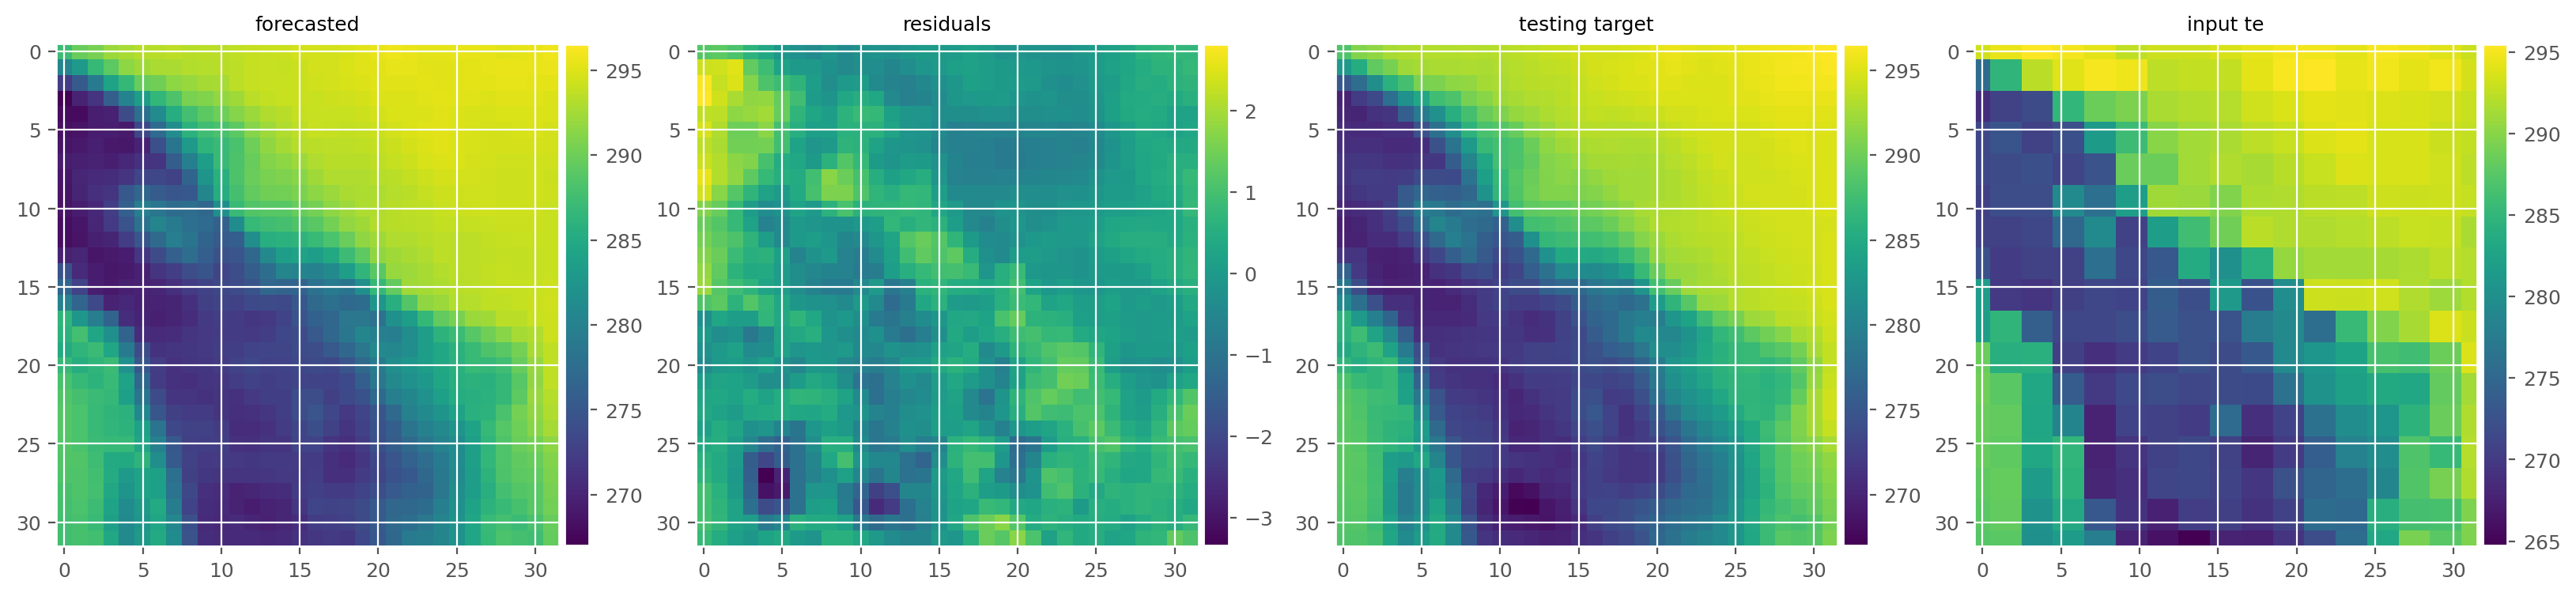

In [90]:
output_plot(input_stack[:12][0],observed_stack[:12][0],fore_stack[:12][0])

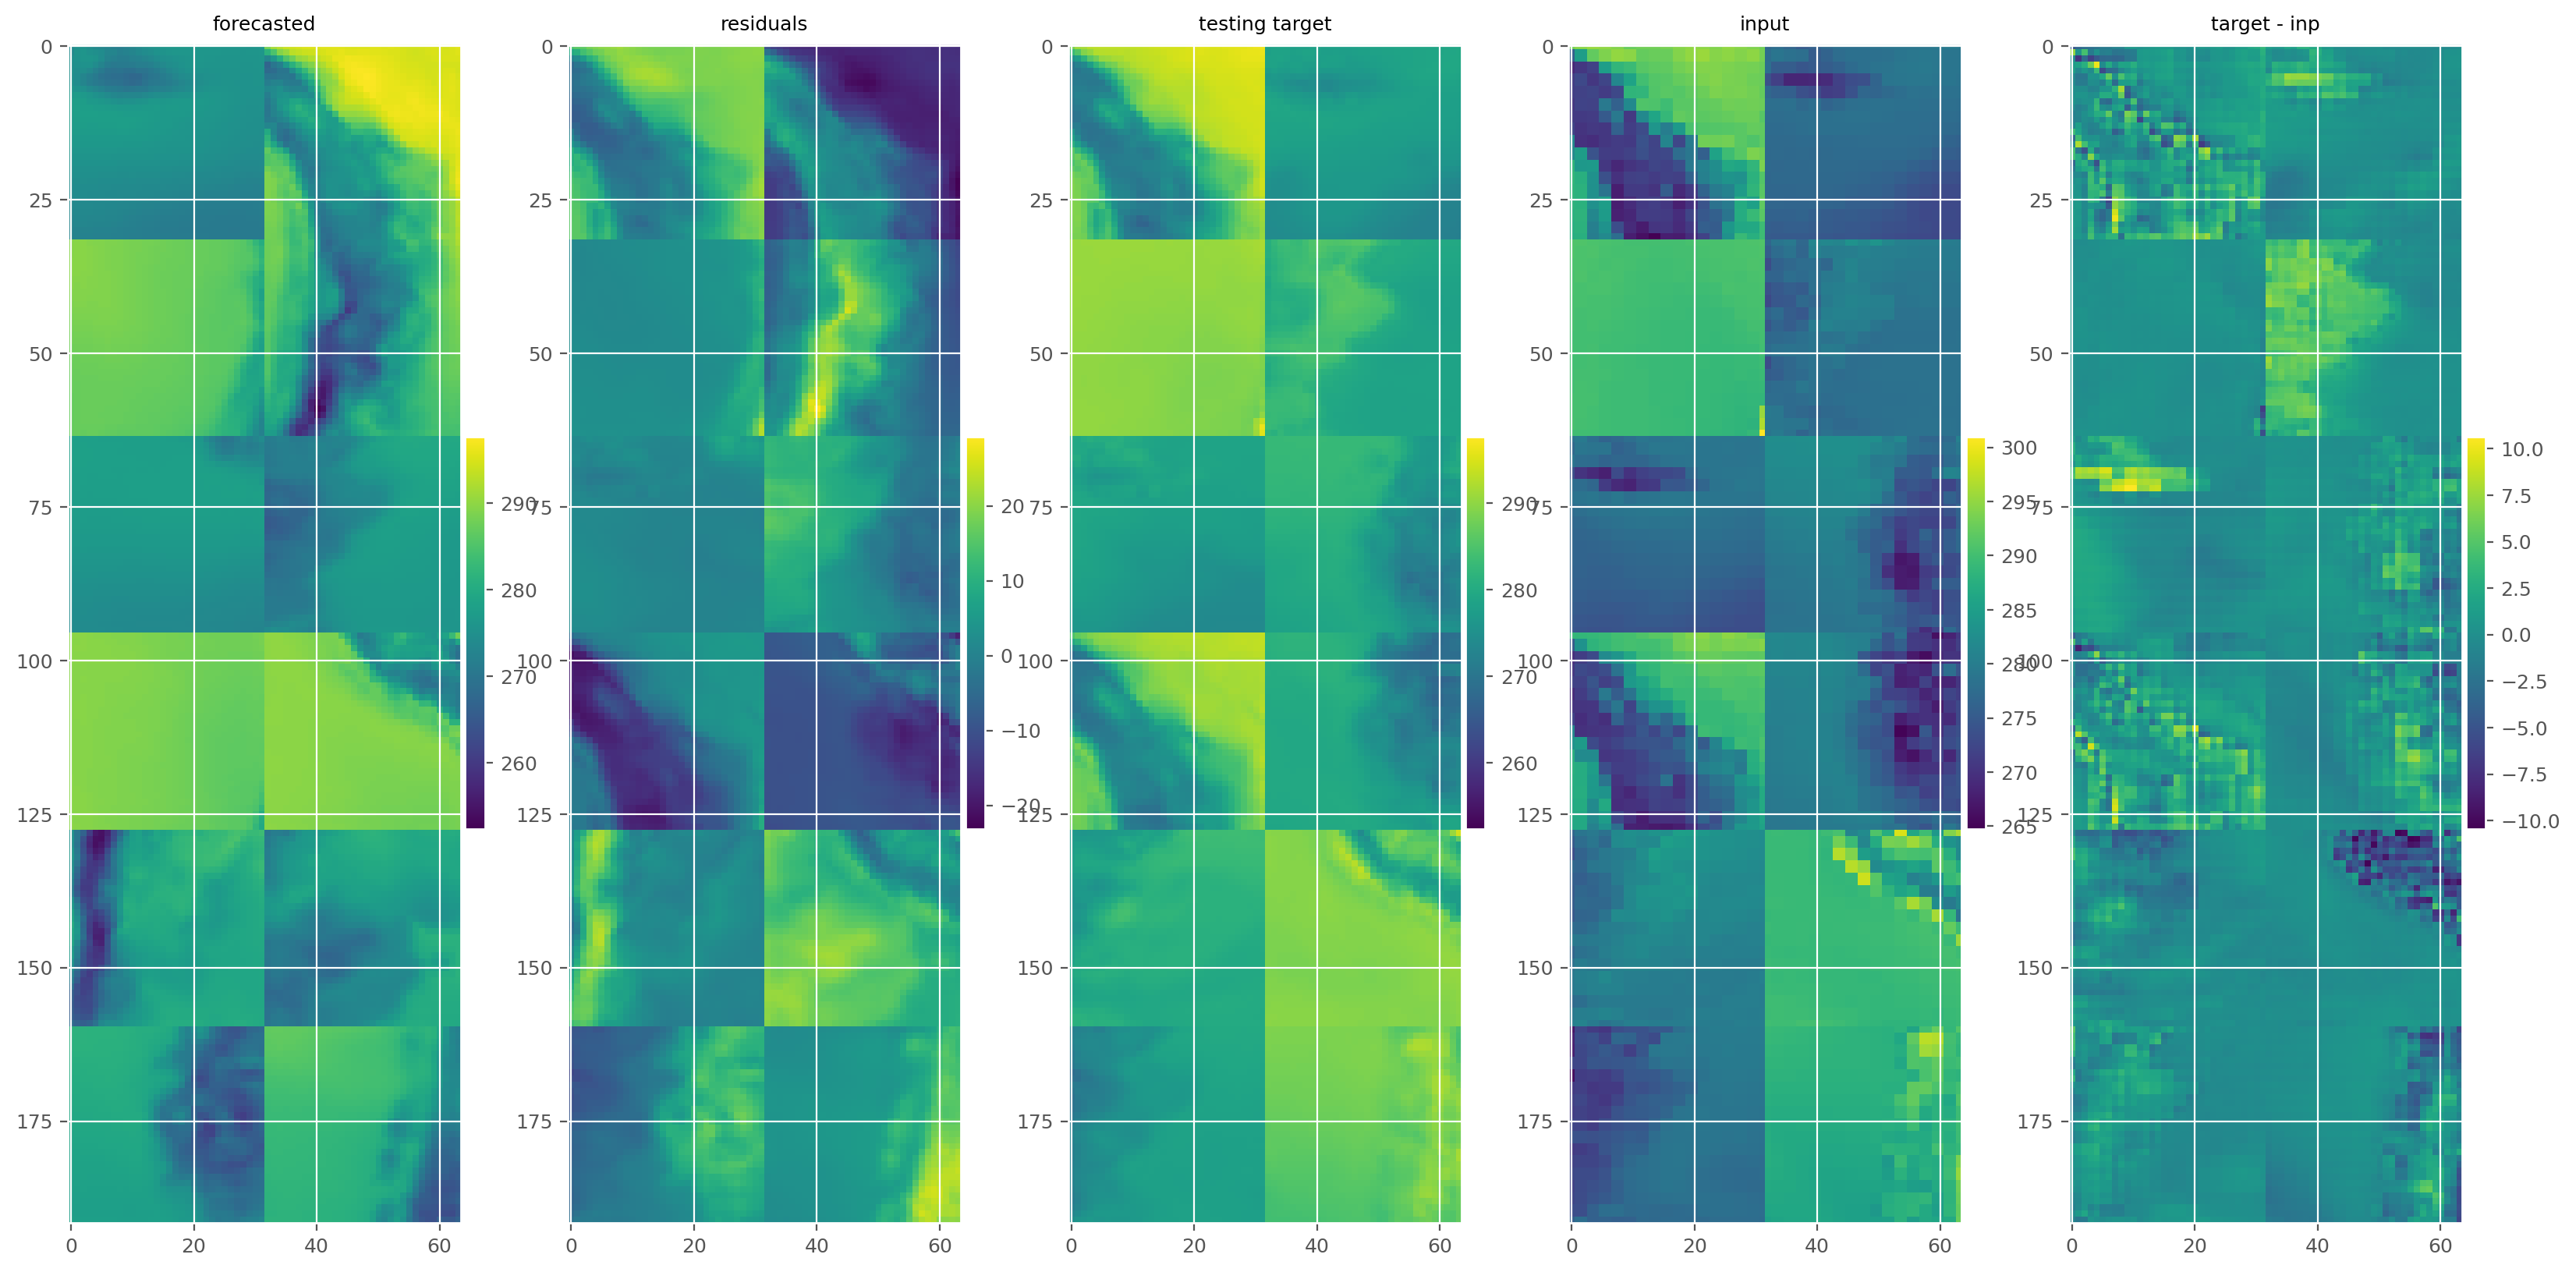

In [59]:
import matplotlib.pyplot as plt


inp= combined_image(input_stack[:12])
target= combined_image(observed_stack[:12])
forecasted= combined_image( fore_stack[:12])
residual=  combined_image( observed_stack[:12] - fore_stack[:12])


params = {'axes.titlesize':'9',
              'xtick.labelsize':'9',
              'ytick.labelsize':'9',
              'figure.figsize': (20,20),
              'figure.dpi': 200
              }
#plt.figure(figsize=[16,16])
plt.style.use('ggplot')
plt.rcParams.update(params)

i=4
plt.subplot(151) #131
p1 = plt.imshow(forecasted, vmin = np.min([forecasted, target]), vmax = np.max([forecasted, target]))
plt.colorbar(orientation="vertical",fraction=0.047, pad=0.01)
plt.title('forecasted')

plt.subplot(152) #132
plt.imshow(residual, vmin = np.min(residual), vmax = np.max(residual))
plt.colorbar(orientation="vertical", fraction=0.047, pad=0.01)
plt.title('residuals')


plt.subplot(153) #132
plt.imshow(target, vmin = np.min([forecasted,target]), vmax = np.max([forecasted,target]))
plt.colorbar(orientation="vertical",fraction=0.047, pad=0.01)
plt.title('testing target')

plt.subplot(154)
p1 = plt.imshow(inp,
                    vmin = np.min([inp]),
                    vmax = np.max([inp]))
plt.colorbar(orientation="vertical",fraction=0.047, pad=0.01)
plt.title('input')

plt.subplot(155) #132
plt.imshow(target - inp, vmin = np.min(target - inp), vmax = np.max(target - inp))
plt.colorbar(orientation="vertical",fraction=0.047, pad=0.01)
plt.title('target - inp')

#plt.savefig('grad_loss.png')
plt.show()